In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score



In [5]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
irs=

In [3]:

# Standardize the data using a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Reduce to 2 dimensions
])

X_pca = pipeline.fit_transform(X)


In [6]:
pca_model = pipeline.named_steps['pca']
explained_variance = pca_model.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))

Explained Variance Ratio: [0.72962445 0.22850762]
Cumulative Explained Variance: [0.72962445 0.95813207]


In [7]:
print("PCA Components (Transformation Matrix):")
print(pca_model.components_)

PCA Components (Transformation Matrix):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


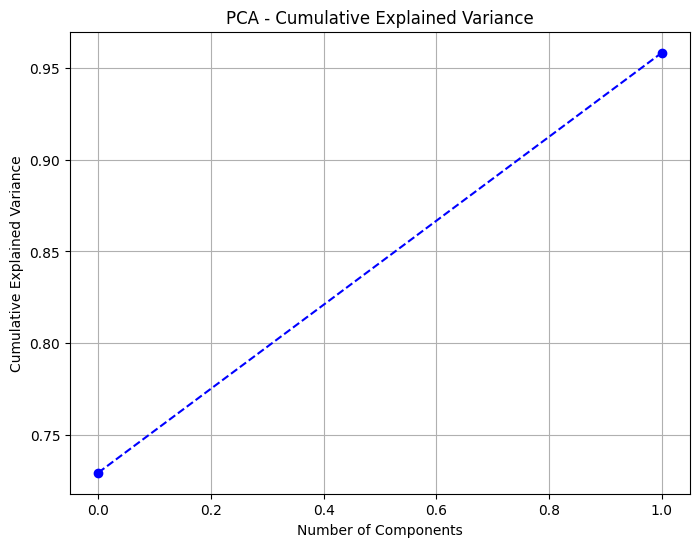

In [8]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()


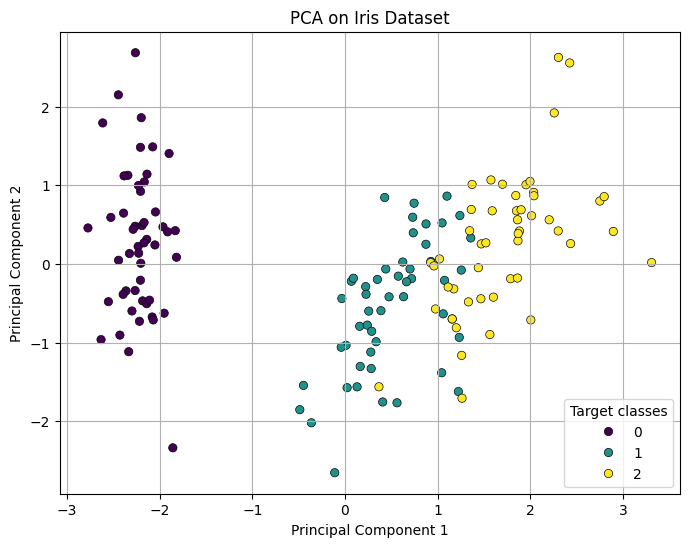

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend(title='Target classes')
plt.grid()
plt.show()

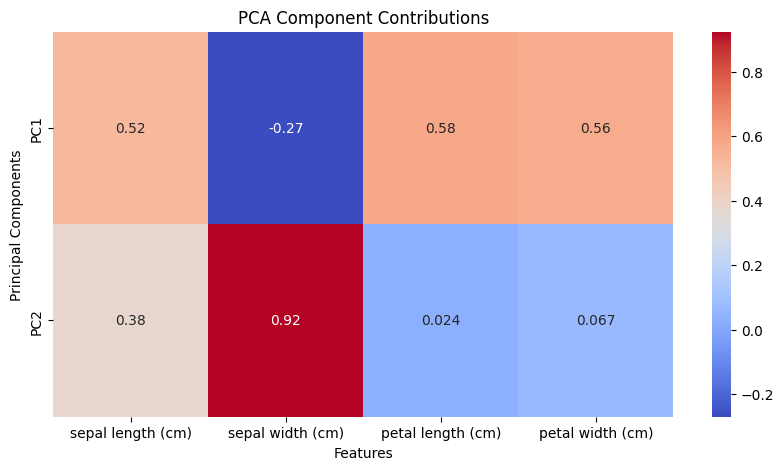

In [10]:
components = pca_model.components_
plt.figure(figsize=(10, 5))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=["PC1", "PC2"])
plt.title('PCA Component Contributions')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()